IMPORTING THE LIBRARIES:

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

IMPORTING DATASET:

In [107]:
dset=pd.read_csv("C:\\Users\\Karthika\\Documents\\advertising.csv")
dset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


PRINTING FIRST TEN ROWS IN THE DATASET:

In [108]:
dset.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


PRINTING LAST TEN ROWS IN THE DATASET:

In [109]:
dset.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [110]:
dset.shape

(200, 4)

DESCRIBING THE DATASET:

In [111]:
dset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


RETRIEVING INFORMATION FROM THE DATASET (about datatypes of each columns & the count of non-null values):

In [112]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


DATA FILTERING AND PREPROCESSING:

In [113]:
dset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

EXPLORATORY DATA ANALYSIS:

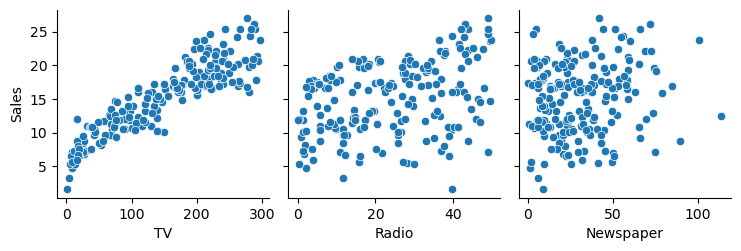

In [114]:
sns.pairplot(dset,x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

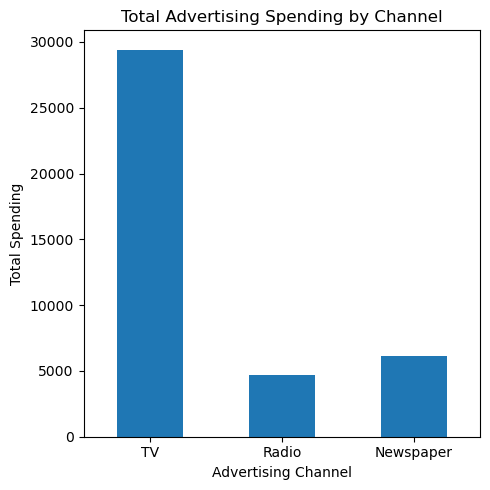

In [166]:
channels = ["TV", "Radio", "Newspaper"]
channel_sum = dset[channels].sum()
plt.figure(figsize=(5, 5))
channel_sum.plot(kind="bar",xlabel="Advertising Channel",ylabel="Total Spending")
plt.title("Total Advertising Spending by Channel")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='TV', ylabel='Frequency'>

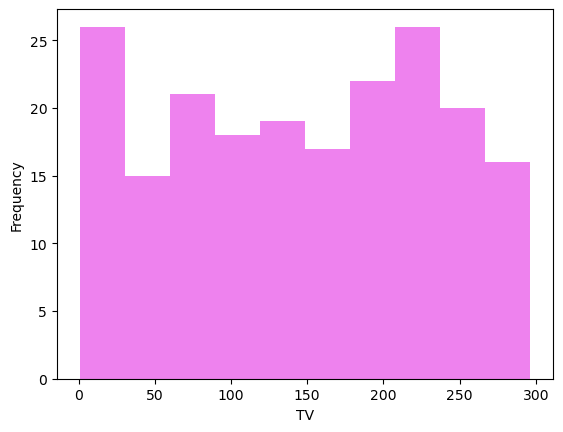

In [131]:
dset['TV'].plot.hist(color="violet",xlabel="TV",title="")

<Axes: xlabel='Radio', ylabel='Frequency'>

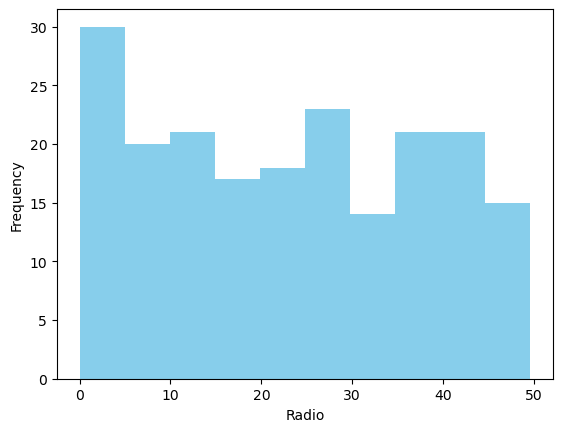

In [130]:
dset['Radio'].plot.hist(color="skyblue",xlabel="Radio",title="")

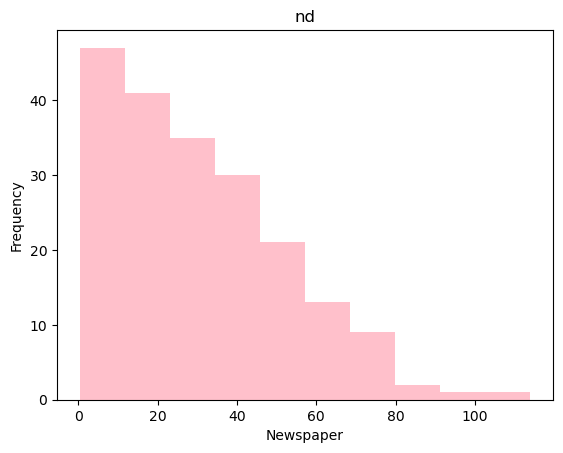

In [148]:
dset['Newspaper'].plot.hist(color="pink",xlabel="Newspaper",title="")
plt.show()

CORRELATION MATRIX:

In [167]:
numeric_columns = dset.select_dtypes(include=['float64', 'int64']) 
correlation_matrix = numeric_columns.corr()  
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


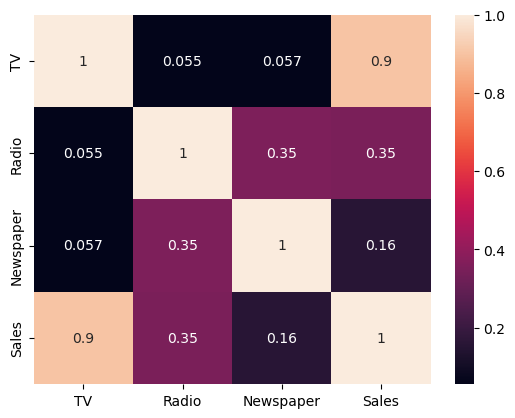

In [125]:
sns.heatmap(dset.corr(),annot=True)
plt.show()

SEPERATING THE FEATURE COLUMNS AND TARGET COLUMN:

In [155]:
x= dset[["TV", "Radio", "Newspaper"]]
y= dset[['Sales']]

In [156]:
print(x.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


In [157]:
print(y.head())

   Sales
0   22.1
1   10.4
2   12.0
3   16.5
4   17.9


In [140]:
x.shape

(200, 3)

In [141]:
y.shape

(200, 1)

SPLITTING THE DATASET INTO 2 PARTS (TRAINING - 80% , TESTING - 20%)

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


MODEL TRAINING:

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [144]:
model_1 = LinearRegression()
model_1.fit (x_train, y_train)

LinearRegression()

In [145]:
model_2 = DecisionTreeRegressor()
model_2.fit(x_train, y_train)

DecisionTreeRegressor()

In [146]:
model_3 = RandomForestRegressor()
model_3.fit(x_train, y_train)

RandomForestRegressor()

MODEL PREDICTION:

In [158]:
x_test_prediction_1 = model_1.predict(x_test)
r2_score_1 = r2_score(y_test, x_test_prediction_1)

x_test_prediction_2 = model_2.predict(x_test)
r2_score_2 = r2_score(y_test, x_test_prediction_2)

x_test_prediction_3 = model_3.predict(x_test)
r2_score_3 = r2_score(y_test, x_test_prediction_3)

In [161]:
regressor_scores = [("LinearRegression", r2_score_1),("DecisionTreeRegressor", r2_score_2),("RandomForestRegressor", r2_score_3)]
sorted_regressor_scores = sorted(regressor_scores, reverse=True, key=lambda x: x[1])

In [160]:
for regressor, score in sorted_regressor_scores:
    print(f"{regressor}\n R-squared score: {score}\n")

RandomForestRegressor
 R-squared score: 0.9615817351426688

DecisionTreeRegressor
 R-squared score: 0.9329114610717475

LinearRegression
 R-squared score: 0.9217965732000767

